In [2]:
import nltk
from pandas import Series, DataFrame
import pandas as pd
%config InlineBackend.figure_format = 'retina'
%pylab inline
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important;}</style>"))
from nltk.corpus import stopwords
from __future__ import division  # Python 2 users only
import nltk, re, pprint
from nltk import word_tokenize
import random
from nltk import word_tokenize
from nltk.util import ngrams
from collections import Counter
from nltk.probability import FreqDist

Populating the interactive namespace from numpy and matplotlib


**Deliverables
The deliverable for this assignment is a file with the python scripts, outputs (including plots & tables where applicable) and your answers to the various questions. Do not forget to write the names of all group members. **

In [3]:
df_data = pd.read_csv('Valid_rev1.csv')

In [4]:
df_data[:3]

Id                                              Title  \
0  13656201               Lead Technical Architect, C  Banking   
1  14663195  RECRUITMENT CONSULTANT  INDUSTRIAL / COMMERCIA...   
2  16530664  Mechanical / Chemical / Process Engineer  Cool...   

                                     FullDescription            LocationRaw  \
0  Lead Technical Architect required for a Tier *...                 London   
1  THIS IS A LIVE VACANCY NOT A GENERIC ADVERTISE...  LEEDS, West Yorkshire   
2  Mechanical / Chemical / Process Engineer  Cool...  Hampshire, South East   

  LocationNormalized ContractType ContractTime                       Company  \
0             London          NaN    permanent              Scope AT Limited   
1              Leeds          NaN    permanent         Code Blue Recruitment   
2          Hampshire          NaN    permanent  Gregory Martin International   

                Category        SourceName  
0                IT Jobs      jobserve.com  
1  HR & Recruitment Jobs  cv-library.co.uk  
2       Engineering Jobs  cv-library.co.uk

In [5]:
import sys  

reload(sys)  
sys.setdefaultencoding('utf8')

In [6]:
job_desc = df_data.FullDescription.sample(10000, random_state=100).values
job_desc_list=job_desc.tolist()
job_desc_list[0] #the first job description (complete)

words=[]
for i in range(0,len(job_desc_list)):
    words1=word_tokenize(job_desc_list[i])
    words.append(words1)

In [13]:
words[0]

['Data',
 'Analyst',
 'Business',
 'Planning',
 'A',
 'major',
 'UK',
 'Rail',
 'organisation',
 'currently',
 'has',
 'an',
 'opportunity',
 'for',
 'a',
 'Data',
 'Analyst',
 'with',
 'strong',
 'business',
 'planning',
 'experience',
 'to',
 'work',
 'on',
 'a',
 'contract',
 'basis',
 'in',
 'Milton',
 'Keynes',
 '.',
 'The',
 'Planning',
 'Analyst',
 'is',
 'responsible',
 'for',
 'extending',
 'the',
 'various',
 'tools',
 'that',
 'were',
 'developed',
 'and',
 'designing',
 'and',
 'implementing',
 'new',
 'features',
 '.',
 'Key',
 'Responsibilities',
 'Own',
 'the',
 'current',
 'tools',
 'developed',
 'to',
 'capture',
 'data',
 'from',
 'various',
 'functions',
 '.',
 'Extend',
 'the',
 'tools',
 'through',
 'design',
 'and',
 'implementation',
 'of',
 'the',
 'functional',
 'requirements',
 'which',
 'can',
 'be',
 'used',
 'by',
 'other',
 'teams',
 'for',
 'easier',
 'capture',
 'of',
 'data',
 'and',
 'interrogation',
 'of',
 'information',
 '.',
 'Develop',
 'and',
 'g

In [11]:
job_words = [item for sublist in words for item in sublist]
job_words

['Data',
 'Analyst',
 'Business',
 'Planning',
 'A',
 'major',
 'UK',
 'Rail',
 'organisation',
 'currently',
 'has',
 'an',
 'opportunity',
 'for',
 'a',
 'Data',
 'Analyst',
 'with',
 'strong',
 'business',
 'planning',
 'experience',
 'to',
 'work',
 'on',
 'a',
 'contract',
 'basis',
 'in',
 'Milton',
 'Keynes',
 '.',
 'The',
 'Planning',
 'Analyst',
 'is',
 'responsible',
 'for',
 'extending',
 'the',
 'various',
 'tools',
 'that',
 'were',
 'developed',
 'and',
 'designing',
 'and',
 'implementing',
 'new',
 'features',
 '.',
 'Key',
 'Responsibilities',
 'Own',
 'the',
 'current',
 'tools',
 'developed',
 'to',
 'capture',
 'data',
 'from',
 'various',
 'functions',
 '.',
 'Extend',
 'the',
 'tools',
 'through',
 'design',
 'and',
 'implementation',
 'of',
 'the',
 'functional',
 'requirements',
 'which',
 'can',
 'be',
 'used',
 'by',
 'other',
 'teams',
 'for',
 'easier',
 'capture',
 'of',
 'data',
 'and',
 'interrogation',
 'of',
 'information',
 '.',
 'Develop',
 'and',
 'g

In [15]:
len(job_words)

2669915

# Part A

**A1. What are the top 5 parts of speech in this corpus of job descriptions? How frequently do they appear?**

Hint: nltk.org is a great resource for exploring text mining with Python. There are many examples that are similar to the questions in this assignment.  

In [14]:
tagged = nltk.pos_tag(job_words)
counts = Counter(tag for word,tag in tagged)
counts.most_common()[:5]

#the most common parts of speech are 
#NN: noun, common/singular/mass

[('NN', 453540),
 ('NNP', 343148),
 ('IN', 259178),
 ('JJ', 217325),
 ('DT', 200641)]

**A2. Does this corpus support Zipf’s law? Plot the most common 100 words in the corpus against the theoretical prediction of the law. For this question, do not remove stopwords. Also do not perform stemming or lemmatization.**

Hint: Check http://www.garysieling.com/blog/exploring-zipfs-law-with-python-nltk-scipy-and-matplotlib 

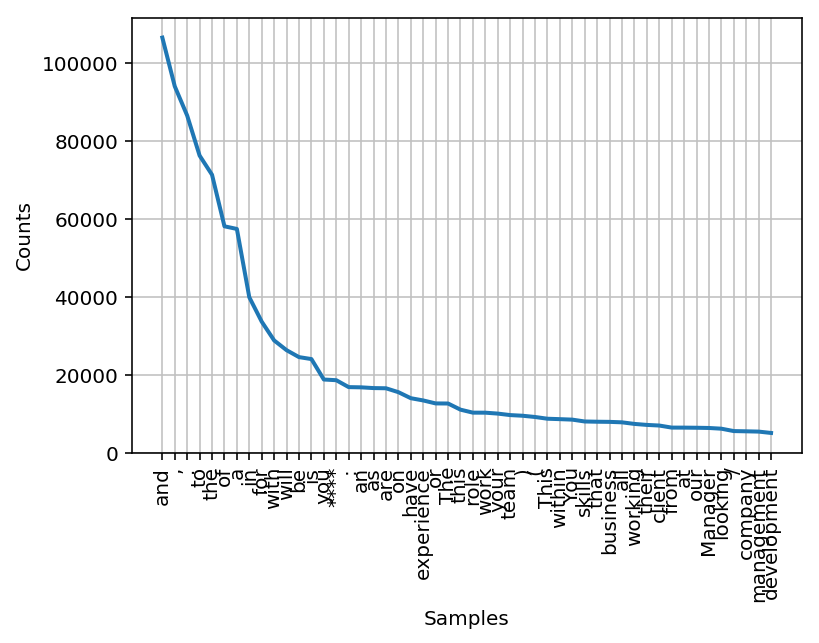

In [16]:
freqdist = FreqDist(job_words)
top_100=freqdist.most_common(100)

freqdist.plot(50, cumulative=False)

print top_100

**A3. If we remove stopwords and lemmatize the corpus, what are the 10 most common words? What are their frequencies?**


In [17]:
filtered_words = [word for word in job_words if word not in stopwords.words('english')]  ##I think filtered words wasn't working before because we hadn't tokenized
#filtered_words
filtered_freq = FreqDist(filtered_words)
filtered_freq.most_common(10)
##'The' will be removed once we get our 'words' list into lowercase

[(',', 94084),
 ('.', 86568),
 ('****', 18688),
 (':', 16918),
 ('experience', 13497),
 ('The', 12711),
 ('role', 10367),
 ('work', 10360),
 ('team', 9743),
 (')', 9573)]

# Part B (predict salary from job description)

In this section, you will create classification models to predict high (75th percentile and above) or low (below 75th percentile) salary from the text contained in the job descriptions. Ignore all other data provided on kaggle.com that is not text (except the actual salary data, which you need to create the binary output of high/low salary).    
Get the training data on kaggle.com (train_rev1) (do not use the validation data provided on kaggle.com). Use the Naïve Bayes classifier to classify job descriptions into high and low salary categories (we will discuss the theory of Naïve Bayes later in this course). There are two versions of Naïve Bayes – binomial and multinomial; for the moment, let’s not bother about the theoretical underpinnings! You can use either one for this assignment. For all models below, show the confusion matrix.
Hint: For part B, check out   http://www.nltk.org/book/ch06.html (esp 1.3) for illustrations.

Also look at http://nbviewer.ipython.org/gist/rjweiss/7158866 (you may have to download additional Python libraries than the ones I have mentioned before) 

**B1. Create a classification model with all words and the bag-of-words approach. How accurate is the model (show the confusion matrix)? **

**B2. Speculate before running the following analysis whether lemmatization would help improve the accuracy of classification. Now create a classification model after lemmatization. Did the classification accuracy increase relative to B1? Comment on your speculation versus the actual results you obtained.**


**B3. Now speculate whether stopwords removal from the original data would help increase the accuracy of the model. Take out the stopwords (but do not lemmatize), build a classification model and check the accuracy, and compare with that in B1 & B2.   
Also show the top 10 words (excluding stopwords) that are most indicative of (i) high salary, and (ii) low salary.** 

**B4.  Use the job descriptions without lemmatiztion and stopword removal. Add parts-of-speech bigrams to the bag-of-words, and run a new classification model. Does the accuracy increase over the results in B1?  **